___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [195]:
import pandas as pd
import numpy as np

In [196]:
from numpy.random import randn
np.random.seed(101)

In [197]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [198]:
df = pd.DataFrame(randn(5,4),index = 'A B C D E'.split(),columns = 'X Y W Z'.split())

In [199]:
df

,X,Y,W,Z
A,0.302665,1.693723,-1.706086,-1.159119
B,-0.134841,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
D,-0.497104,-0.754070,-0.943406,0.484752
E,-0.116773,1.901755,0.238127,1.996652


## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [200]:
df['W']

A   -1.706086
B    0.166905
C    0.638787
D   -0.943406
E    0.238127
Name: W, dtype: float64

In [201]:
# Pass a list of column names
df[['W','Z']]

,W,Z
A,-1.706086,-1.159119
B,0.166905,0.184502
C,0.638787,0.329646
D,-0.943406,0.484752
E,0.238127,1.996652


In [202]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A   -1.706086
B    0.166905
C    0.638787
D   -0.943406
E    0.238127
Name: W, dtype: float64

DataFrame Columns are just Series

In [203]:
type(df['W'])

pandas.core.series.Series

**Creating a new column:**

In [204]:
df['new'] = df['W'] + df['Y']

In [205]:
df

,X,Y,W,Z,new
A,0.302665,1.693723,-1.706086,-1.159119,-0.012363
B,-0.134841,0.390528,0.166905,0.184502,0.557432
C,0.807706,0.072960,0.638787,0.329646,0.711747
D,-0.497104,-0.754070,-0.943406,0.484752,-1.697476
E,-0.116773,1.901755,0.238127,1.996652,2.139882


** Removing Columns**

In [206]:
df.drop('new',axis=1)

,X,Y,W,Z
A,0.302665,1.693723,-1.706086,-1.159119
B,-0.134841,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
D,-0.497104,-0.754070,-0.943406,0.484752
E,-0.116773,1.901755,0.238127,1.996652


In [207]:
# Not inplace unless specified!
df

,X,Y,W,Z,new
A,0.302665,1.693723,-1.706086,-1.159119,-0.012363
B,-0.134841,0.390528,0.166905,0.184502,0.557432
C,0.807706,0.072960,0.638787,0.329646,0.711747
D,-0.497104,-0.754070,-0.943406,0.484752,-1.697476
E,-0.116773,1.901755,0.238127,1.996652,2.139882


In [208]:
df.drop('new',axis=1,inplace=True)

In [209]:
df

,X,Y,W,Z
A,0.302665,1.693723,-1.706086,-1.159119
B,-0.134841,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
D,-0.497104,-0.754070,-0.943406,0.484752
E,-0.116773,1.901755,0.238127,1.996652


Can also drop rows this way:

In [210]:
df.drop('E',axis=0)

,X,Y,W,Z
A,0.302665,1.693723,-1.706086,-1.159119
B,-0.134841,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
D,-0.497104,-0.754070,-0.943406,0.484752


** Selecting Rows**

In [211]:
df.loc['A']

X    0.302665
Y    1.693723
W   -1.706086
Z   -1.159119
Name: A, dtype: float64

Or select based off of position instead of label 

In [212]:
df.iloc[2]

X    0.807706
Y    0.072960
W    0.638787
Z    0.329646
Name: C, dtype: float64

** Selecting subset of rows and columns **

In [213]:
df.loc['B','Y']

0.3905278427337413

In [214]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,-1.706086,1.693723
B,0.166905,0.390528


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [215]:
df

,X,Y,W,Z
A,0.302665,1.693723,-1.706086,-1.159119
B,-0.134841,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
D,-0.497104,-0.754070,-0.943406,0.484752
E,-0.116773,1.901755,0.238127,1.996652


In [216]:
df>0

,X,Y,W,Z
A,True,True,False,False
B,False,True,True,True
C,True,True,True,True
D,False,False,False,True
E,False,True,True,True


In [217]:
df[df>0]

,X,Y,W,Z
A,0.302665,1.693723,NaN,NaN
B,NaN,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
D,NaN,NaN,NaN,0.484752
E,NaN,1.901755,0.238127,1.996652


In [218]:
df[df['W']>0]

,X,Y,W,Z
B,-0.134841,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
E,-0.116773,1.901755,0.238127,1.996652


In [219]:
df[df['W']>0]['Y']

B    0.390528
C    0.072960
E    1.901755
Name: Y, dtype: float64

In [220]:
df[df['W']>0][['Y','X']]

,Y,X
B,0.390528,-0.134841
C,0.072960,0.807706
E,1.901755,-0.116773


For two conditions you can use | and & with parenthesis:

In [221]:
df[(df['W']>0) & (df['Y'] > 1)]

,X,Y,W,Z
E,-0.116773,1.901755,0.238127,1.996652


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [222]:
df

,X,Y,W,Z
A,0.302665,1.693723,-1.706086,-1.159119
B,-0.134841,0.390528,0.166905,0.184502
C,0.807706,0.072960,0.638787,0.329646
D,-0.497104,-0.754070,-0.943406,0.484752
E,-0.116773,1.901755,0.238127,1.996652


In [223]:
# Reset to default 0,1...n index
df.reset_index()

,index,X,Y,W,Z
0,A,0.302665,1.693723,-1.706086,-1.159119
1,B,-0.134841,0.390528,0.166905,0.184502
2,C,0.807706,0.072960,0.638787,0.329646
3,D,-0.497104,-0.754070,-0.943406,0.484752
4,E,-0.116773,1.901755,0.238127,1.996652


In [224]:
newind = 'CA NY WY OR CO'.split()

In [225]:
df['States'] = newind

In [226]:
df

,X,Y,W,Z,States
A,0.302665,1.693723,-1.706086,-1.159119,CA
B,-0.134841,0.390528,0.166905,0.184502,NY
C,0.807706,0.072960,0.638787,0.329646,WY
D,-0.497104,-0.754070,-0.943406,0.484752,OR
E,-0.116773,1.901755,0.238127,1.996652,CO


In [227]:
df.set_index('States')

,X,Y,W,Z
States,,,,
CA,0.302665,1.693723,-1.706086,-1.159119
NY,-0.134841,0.390528,0.166905,0.184502
WY,0.807706,0.072960,0.638787,0.329646
OR,-0.497104,-0.754070,-0.943406,0.484752
CO,-0.116773,1.901755,0.238127,1.996652


In [228]:
df

,X,Y,W,Z,States
A,0.302665,1.693723,-1.706086,-1.159119,CA
B,-0.134841,0.390528,0.166905,0.184502,NY
C,0.807706,0.072960,0.638787,0.329646,WY
D,-0.497104,-0.754070,-0.943406,0.484752,OR
E,-0.116773,1.901755,0.238127,1.996652,CO


In [229]:
df.set_index('States',inplace=True)

In [230]:
df

,X,Y,W,Z
States,,,,
CA,0.302665,1.693723,-1.706086,-1.159119
NY,-0.134841,0.390528,0.166905,0.184502
WY,0.807706,0.072960,0.638787,0.329646
OR,-0.497104,-0.754070,-0.943406,0.484752
CO,-0.116773,1.901755,0.238127,1.996652


## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [231]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [232]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [233]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1 -0.993263  0.196800
   2 -1.136645  0.000366
   3  1.025984 -0.156598
G2 1 -0.031579  0.649826
   2  2.154846 -0.610259
   3 -0.755325 -0.346419

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [234]:
df.loc['G1']

,A,B
1,-0.993263,0.196800
2,-1.136645,0.000366
3,1.025984,-0.156598


In [235]:
df.loc['G1'].loc[1]

A   -0.993263
B    0.196800
Name: 1, dtype: float64

In [236]:
df.index.names

FrozenList([None, None])

In [237]:
df.index.names = ['Group','Num']

In [238]:
df

A         B
Group Num                    
G1    1   -0.993263  0.196800
      2   -1.136645  0.000366
      3    1.025984 -0.156598
G2    1   -0.031579  0.649826
      2    2.154846 -0.610259
      3   -0.755325 -0.346419

In [239]:
df.xs('G1').reset_index()

,Num,A,B
0,1,-0.993263,0.196800
1,2,-1.136645,0.000366
2,3,1.025984,-0.156598


In [240]:
df.xs('G1').reset_index()['A']

0   -0.993263
1   -1.136645
2    1.025984
Name: A, dtype: float64

In [241]:
df.xs(1,level='Num')

,A,B
Group,,
G1,-0.993263,0.196800
G2,-0.031579,0.649826


# Great Job!

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
df= pd.DataFrame(np.arange(50).reshape(5,10)*np.random.randn(50).reshape(5,10), columns = 'A B C D E F G H I J'.split())
df

,A,B,C,D,E,F,G,H,I,J
0,0.000000,-0.479448,1.117539,3.074431,-3.703497,9.314321,-6.802903,4.273345,3.088242,18.756167
1,-3.765187,2.533700,8.174512,13.456626,-0.436247,29.098985,-16.082991,-12.610425,3.368241,-13.924058
2,-27.658402,31.132405,21.152079,-49.247883,23.821763,29.806016,-27.216268,34.904644,-41.090393,-14.328765
3,-4.876042,15.060071,12.559642,7.309193,-29.076665,53.969664,23.987496,-19.914681,-21.606092,54.886192
4,25.672220,-37.109096,-16.428578,44.216606,-86.794625,-39.009827,33.156230,-57.484856,77.125433,-54.669788


In [244]:
df['B']>0

0    False
1     True
2     True
3     True
4    False
Name: B, dtype: bool

In [245]:
df>0

,A,B,C,D,E,F,G,H,I,J
0,False,False,True,True,False,True,False,True,True,True
1,False,True,True,True,False,True,False,False,True,False
2,False,True,True,False,True,True,False,True,False,False
3,False,True,True,True,False,True,True,False,False,True
4,True,False,False,True,False,False,True,False,True,False


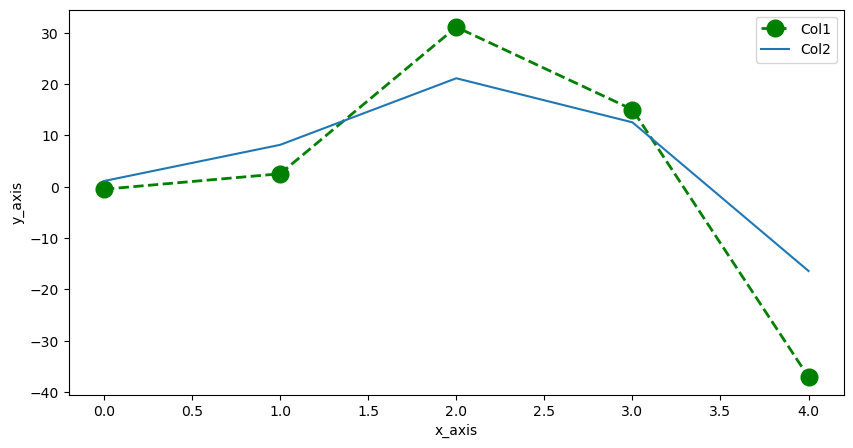

In [246]:
plt.figure(figsize=(10,5))
plt.plot(df['B'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(df['C'])
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.legend('Col1 Col2'.split())

In [247]:
import seaborn as sns

In [248]:
sns.lineplot(df['B'],df['B']**2)

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
tips=sns.load_dataset('tips')

In [ ]:
tips

In [ ]:
sns.pairplot(tips)

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, hue='sex')

In [ ]:
sns.barplot(x='smoker', y='tip', data=tips, hue='sex')

In [ ]:
tips.groupby('smoker').count()

In [ ]:
tips.groupby('smoker').mean()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(tips['total_bill'])
plt.subplot(1,2,2)
plt.plot(tips['smoker'])